## **Import Library**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from category_encoders import OneHotEncoder, BinaryEncoder

from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate

import pickle
import string
from unidecode import unidecode


## **Load Dataset**

### **Player Stats Dataset**

In [2]:
stats = pd.read_csv('2021-2022 Football Player Stats.csv', encoding='unicode_escape')
stats.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


### **Player Price Dataset**

In [3]:
price = pd.read_csv('2022_2023_football_summer_transfers_v2.csv')
price.head()

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Erling Haaland,Centre-Forward,21,150.0,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60.0,False
1,Antony,Right Winger,22,35.0,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95.0,False
2,Wesley Fofana,Centre-Back,21,40.0,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80.4,False
3,Aurélien Tchouameni,Defensive Midfield,22,60.0,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80.0,False
4,Darwin Núñez,Centre-Forward,23,55.0,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,75.0,False


## **Data Cleaning**

### **Player Stats Dataset**

#### Check Missing Value

In [4]:
stats.isna().sum()
#Cannot see all columns with missing value because there are too many columns

Rk         0
Player     0
Nation     1
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 143, dtype: int64

In [5]:
stats[stats.isin(['-']).any(axis=1)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


In [6]:
missingColumn = stats.isna().sum()
missingChecker = 0
for i in range (len(missingColumn)):
    if (missingColumn[i]) != 0 :
        print(f'Column index number : {i} has {missingColumn[i]} missing value')
        missingChecker = missingChecker + 1
    elif i == (len(missingColumn)-1) and  missingChecker == 0 :
        print('No missing value found')

Column index number : 2 has 1 missing value
Column index number : 6 has 1 missing value


In [7]:
stats.iloc[:, [2, 6]].columns

Index(['Nation', 'Age'], dtype='object')

In [8]:
stats['Nation'].fillna('Unknown', inplace=True)
stats['Age'].fillna(stats['Age'].median(), inplace=True)

In [9]:
missingColumn = stats.isna().sum()
missingChecker = 0

for i in range (len(missingColumn)):
    if (missingColumn[i]) != 0 :
        print(f'Column index number : {i} has {missingColumn[i]} missing value')
        missingChecker = missingChecker + 1
    elif i == (len(missingColumn)-1) and  missingChecker == 0 :
        print('No missing value found')

No missing value found


#### Convert Non Alphabet Player Name to Alphabet 

In [10]:
for i in range(len(stats.Player)):
     stats.Player[i] = unidecode(stats.Player[i])

#Remove non alphabet that not detected by unidecode
stats.Player.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)


C:\Users\kenta\AppData\Local\Temp\ipykernel_16528\767582460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats.Player[i] = unidecode(stats.Player[i])


### **Player Price Dataset**

#### Check Missing Value

In [11]:
#Replace '-' value to missing value
price.replace('-', np.nan,inplace=True)

In [12]:
price.isna().sum()

name            0
position        0
age             1
market_value    0
country_from    1
league_from     0
club_from       0
country_to      0
league_to       0
club_to         0
fee             0
loan            0
dtype: int64

In [13]:
price['country_from'].fillna('Unknown', inplace=True)
price['age'].fillna(price['age'].median(), inplace=True)

In [14]:
price.isna().sum()

name            0
position        0
age             0
market_value    0
country_from    0
league_from     0
club_from       0
country_to      0
league_to       0
club_to         0
fee             0
loan            0
dtype: int64

#### Convert Non Alphabet Player Name to Alphabet 

In [15]:
for i in range(len(price.name)):
     price.name[i] = unidecode(price.name[i])

#Remove non alphabet that not detected by unidecode     
price.name.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

C:\Users\kenta\AppData\Local\Temp\ipykernel_16528\3639197262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price.name[i] = unidecode(price.name[i])


## **Join Dataset**

In [16]:
#Drop redundant or unused columns
stats.drop(columns=['Rk','Born','Comp','Squad','Pos'],inplace=True)
#Rename 'name' column on player price dataset to Player
price.rename(columns = {'name':'Player'}, inplace = True)

In [17]:
#Join 2 Datasets based on 'Player' columns
df = price.merge(stats, on='Player', how='inner')
df.head()

,Player,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Erling Haaland,Centre-Forward,21,150.0,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,...,0.66,0.38,0.09,0.00,0.00,0.0,3.25,2.36,1.93,54.9
1,Wesley Fofana,Centre-Back,21,40.0,England,Premier League,Leicester City,England,Premier League,Chelsea FC,...,0.00,0.00,0.71,0.00,0.00,0.0,10.90,3.29,1.71,65.7
2,Aurelien Tchouameni,Defensive Midfield,22,60.0,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,...,0.06,0.74,2.06,0.00,0.03,0.0,11.80,2.65,1.08,71.1
3,Casemiro,Defensive Midfield,30,40.0,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,...,0.14,0.35,2.25,0.04,0.00,0.0,12.20,3.93,1.93,67.1
4,Alexander Isak,Centre-Forward,22,30.0,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,...,0.63,0.92,0.38,0.00,0.00,0.0,3.19,1.30,2.23,36.9


## **Final Dataset**

### **Drop Free Transfered Player**

In [18]:
indexFreeTransfer = df[ (df['fee'] == 0) & (df['loan'] == False) ].index
df.drop(indexFreeTransfer , inplace=True)
df.head()

,Player,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Erling Haaland,Centre-Forward,21,150.0,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,...,0.66,0.38,0.09,0.00,0.00,0.0,3.25,2.36,1.93,54.9
1,Wesley Fofana,Centre-Back,21,40.0,England,Premier League,Leicester City,England,Premier League,Chelsea FC,...,0.00,0.00,0.71,0.00,0.00,0.0,10.90,3.29,1.71,65.7
2,Aurelien Tchouameni,Defensive Midfield,22,60.0,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,...,0.06,0.74,2.06,0.00,0.03,0.0,11.80,2.65,1.08,71.1
3,Casemiro,Defensive Midfield,30,40.0,Spain,LaLiga,Real Madrid,England,Premier League,Manchester United,...,0.14,0.35,2.25,0.04,0.00,0.0,12.20,3.93,1.93,67.1
4,Alexander Isak,Centre-Forward,22,30.0,Spain,LaLiga,Real Sociedad,England,Premier League,Newcastle United,...,0.63,0.92,0.38,0.00,0.00,0.0,3.19,1.30,2.23,36.9


### **Create Column Transformer**

Column transformer is created to transform categorical columns to numerical column. In this case, i use binary encoder to transform all categorical columns.

In [19]:
transformer = ColumnTransformer([
    ('binary_encoder', BinaryEncoder(), ['Nation','position','country_from','club_from','country_to','club_to','league_from','league_to']),
    ], remainder='passthrough')

### **Feature and Target Splitting**

In [20]:
x = df.drop(columns=['fee','Player']) #x as fitur
y = df['fee'] #y as target

### **Data Train and Test Splitting**

In [21]:
# Split
xtrain, xtest, ytrain, ytest = train_test_split(
    x, 
    y,
    test_size=0.2,
    random_state=100
)

### **Model Benchmarking**

In [22]:
linreg = LinearRegression()
dt = DecisionTreeRegressor(random_state=100)
knn = KNeighborsRegressor()
xgb = XGBRegressor()    
rfr = RandomForestRegressor(random_state=100)

model = [linreg,dt,knn,xgb,rfr]

In [23]:
list_model = []
list_mae = []
list_rmse = []
mae_std = []
rmse_std = []

for i in model:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', i) 
    ])

    # cross validation
    cv_score = cross_validate( 
        estimator= pipe_model,  # model
        X = xtrain,            # X_train
        y = ytrain,            # y_train
        cv = 5,                 # berapa fold
        scoring= ['neg_mean_absolute_error','neg_mean_absolute_percentage_error',
                  'neg_mean_squared_error','neg_root_mean_squared_error']
    )
    
    list_model.append(i)
    list_mae.append(cv_score['test_neg_mean_absolute_error'].mean()) 
    list_rmse.append(cv_score['test_neg_root_mean_squared_error'].mean())
    mae_std.append(cv_score['test_neg_mean_absolute_error'].std())
    rmse_std.append(cv_score['test_neg_root_mean_squared_error'].std())

In [24]:
Hasil = pd.DataFrame()

Hasil['Model'] = list_model
Hasil['RMSE'] = np.negative(list_rmse)
Hasil['RMSE std'] = rmse_std
Hasil['MAE'] = np.negative(list_mae)
Hasil['MAE std'] = mae_std

Hasil.sort_values(by='RMSE')

,Model,RMSE,RMSE std,MAE,MAE std
4,RandomForestRegressor(random_state=100),6.785550,1.274843,3.345263,0.620275
3,"XGBRegressor(base_score=None, booster=None, ca...",7.447981,0.564217,3.533103,0.404548
1,DecisionTreeRegressor(random_state=100),8.575578,1.475007,3.853097,0.746890
2,KNeighborsRegressor(),12.370098,2.033462,7.486320,0.911440
0,LinearRegression(),16.019767,4.714256,9.202037,1.023295


Based on cross validate result, RandomForestRegressor is the best model among the others because RandomForestRegressor has the lowest RMSE, and MAE value. So, i will use RandomForestRegressor to predict the test data.

### **Predicting Data Test**

In [25]:
predict_MAE_rfr = []
predict_RMSE_rfr = []

pipe_model_rfr = Pipeline([
    ('preprocessing',transformer),
    ('modeling',RandomForestRegressor(random_state=100))
])

#fit
pipe_model_rfr.fit(xtrain,ytrain)

#predict
ypredict_rfr = pipe_model_rfr.predict(xtest)
predict_MAE_rfr.append(mean_absolute_error(ytest,ypredict_rfr))
predict_RMSE_rfr.append(np.sqrt(mean_squared_error(ytest, ypredict_rfr)))

Hasil_predict_rfr = pd.DataFrame()
Hasil_predict_rfr['Model'] = ['RandomForestRegressor']
Hasil_predict_rfr['MAE'] = predict_MAE_rfr
Hasil_predict_rfr['RMSE'] = predict_RMSE_rfr
Hasil_predict_rfr

,Model,MAE,RMSE
0,RandomForestRegressor,2.83282,5.788885


### **Actual vs Predicted Price**

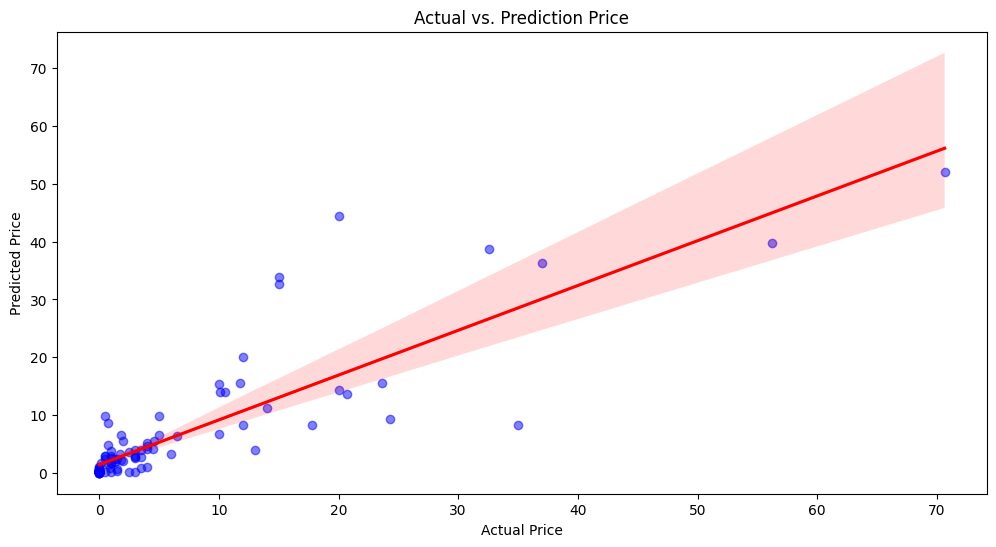

In [26]:
plt.figure(figsize=(12, 6))
sns.regplot(x=ytest, y=ypredict_rfr,
                    scatter_kws = {"color": "blue", "alpha" : 0.5},
                    line_kws = {"color": "red"}).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');
plt.show()

### **Feature Importance**

In [27]:
feature_imp = pd.DataFrame(pipe_model_rfr['modeling'].feature_importances_, transformer.get_feature_names_out()).reset_index()
feature_imp.rename(columns={'index' : 'Feature', 0 : 'Importance Value'}).sort_values(by='Importance Value', ascending=False).head()


,Feature,Importance Value
48,remainder__market_value,0.620364
49,remainder__loan,0.146431
163,remainder__Car3rd,0.012574
59,remainder__G/Sh,0.007954
27,binary_encoder__country_to_4,0.007368


### **Deploy Model**

In [28]:
# #Save Model
# pickle.dump(pipe_model_rfr, open('football_player_price_predictor.sav', 'wb'))

In [29]:
# #Load Model
# filename = 'football_player_price_predictor.sav'
# loaded_model = pickle.load(open(filename, 'rb'))
# mean_squared_error(ytest, loaded_model.predict(xtest))